In [3]:
import medmnist
#print("successfully installed madmnist, version:", medmnist.__version__)

#importing training, validating and testing data seperately
# from medmnist import PneumoniaMNIST
# dataset = PneumoniaMNIST(split="test", download=True)
# print(dataset)

import numpy as np
data = np.load('Dataset/pneumoniamnist.npz')
data_train = data['train_images']
data_test = data['test_images']
data_val = data['val_images']
label_train = data['train_labels']
label_test = data['test_labels']
label_val = data['val_labels']
print(len(data_val))

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/pneumoniamnist.npz'

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Flatten the images and normalize pixel values

n_samples = len(data_train)
data_temp = data_train.reshape((n_samples, -1))
data_tr = StandardScaler().fit_transform(data_temp)

n_samples = len(data_test)
data_temp = data_test.reshape((n_samples, -1))
data_te = StandardScaler().fit_transform(data_temp)
n_samples = len(data_val)
data_temp = data_val.reshape((n_samples, -1))
data_va = StandardScaler().fit_transform(data_temp)


NameError: name 'data_train' is not defined

In [38]:
# Tried kernals and regularization parameters
kernels = {'linear', 'rbf', 'poly','sigmoid'}
C = {0.1,1,10,100}
# Initialize an empty dictionary to store results
accuracy_results = {'kernel': [], 'C': [], 'accu': []}

In [39]:
# trying different svm kernals with different regularization parameters
for i in kernels:
    for c in C:
        # Create an SVM classifier
        clf_svm = SVC(kernel= i , C = c)

        # Train the classifier
        clf_svm.fit(data_tr, label_train)

        # Make predictions on the test set
        y_pred = clf_svm.predict(data_te)

        # Evaluate the performance
        accu_svm = accuracy_score(label_test, y_pred)

        # storing performance values for plotting

        accuracy_results['kernel'].append(i)
        accuracy_results['C'].append(c)
        accuracy_results['accu'].append(accu_svm)

        # Display classification report
        #print(f'Report for SVM with {i} kernal and regularization parameter = {c}:')
        #print(classification_report(label_test, y_pred))



c:\Users\zhujy\.conda\envs\ALMS\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zhujy\.conda\envs\ALMS\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zhujy\.conda\envs\ALMS\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zhujy\.conda\envs\ALMS\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

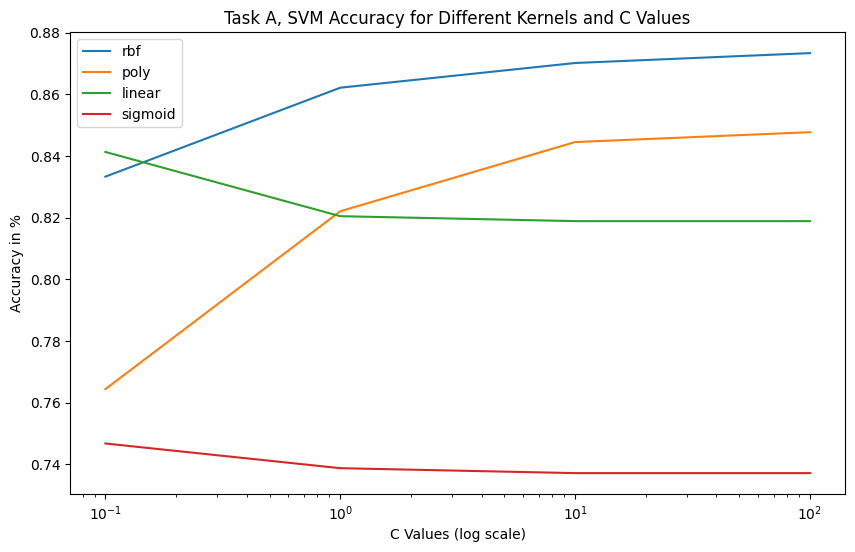

In [40]:
import pandas as pd
df_results = pd.DataFrame(accuracy_results)

fig, ax = plt.subplots(figsize=(10, 6))

for i in kernels:
    kernel_df = df_results[df_results['kernel'] == i]
    ax.plot(kernel_df['C'], kernel_df['accu'], label=i)

ax.set_xscale('log')

ax.set_xlabel('C Values (log scale)')
ax.set_ylabel('Accuracy in %')
ax.set_title('Task A, SVM Accuracy for Different Kernels and C Values')
ax.legend()
plt.show()

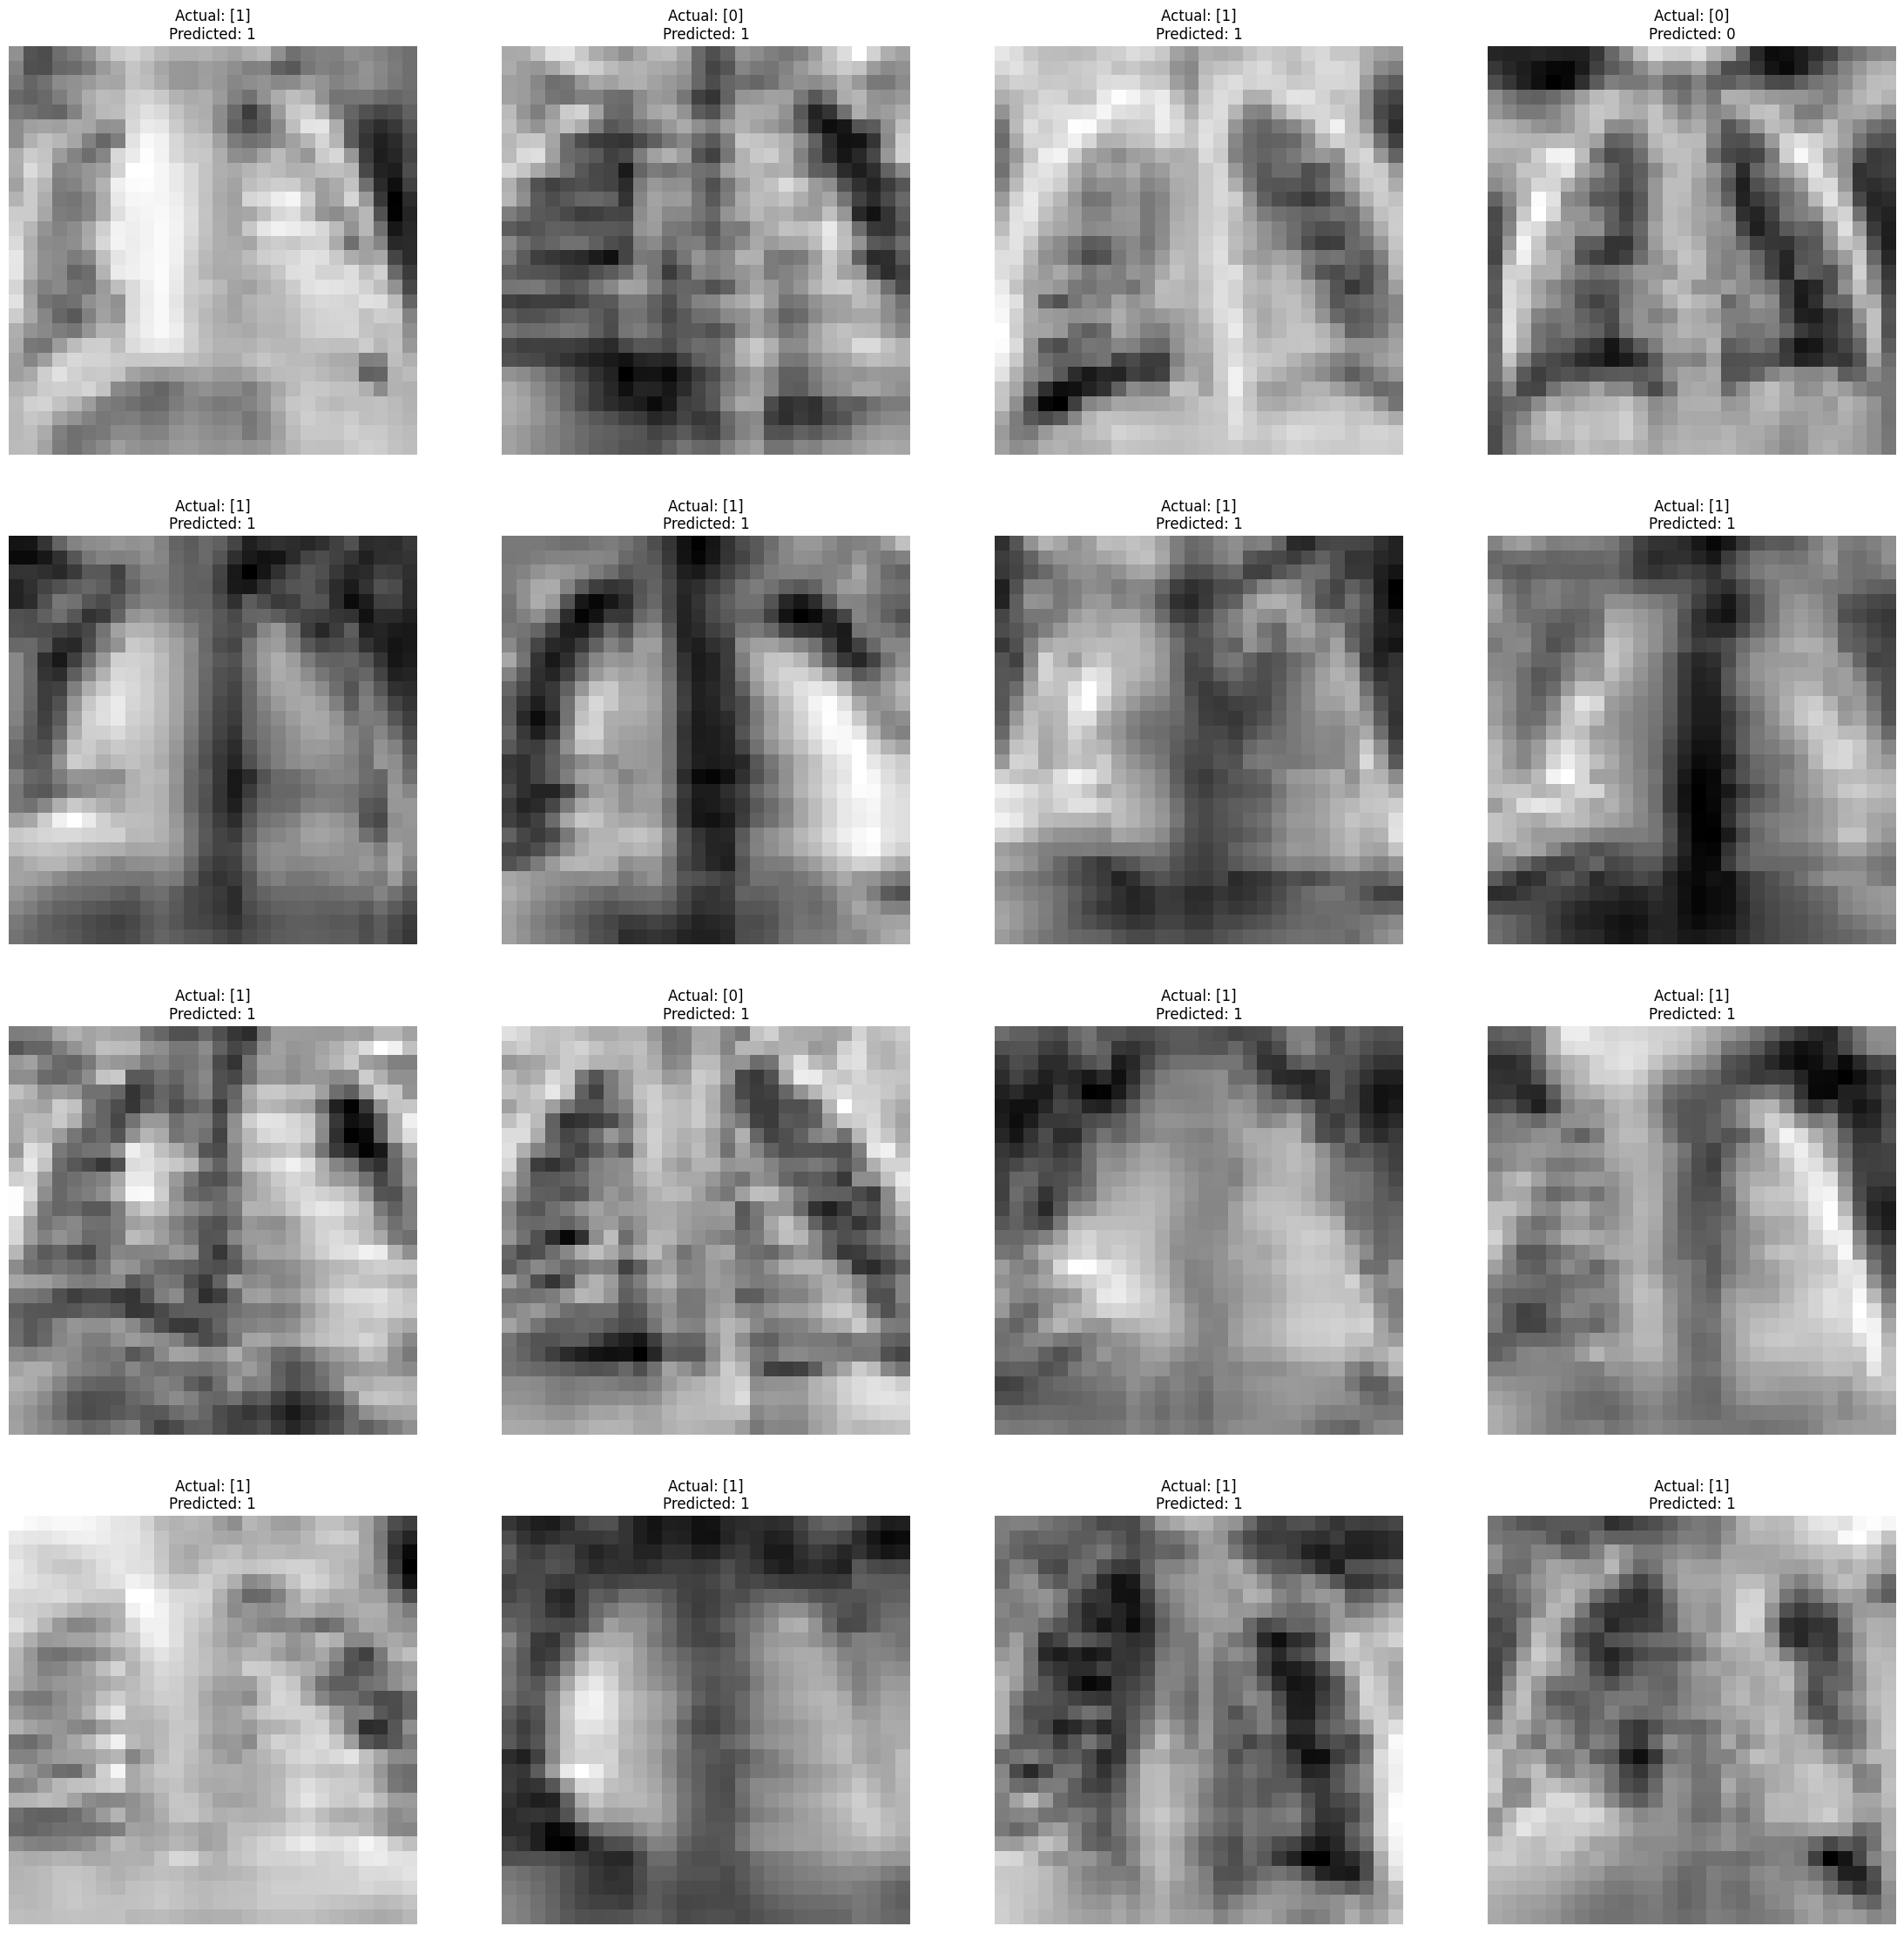

In [16]:

# Visualize some predictions
fig, axes = plt.subplots(4, 4, figsize=(28, 28))
for i, ax in enumerate(axes.flat):
    ax.imshow(data_te[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Actual: {label_test[i]}\nPredicted: {y_pred[i]}')
    ax.axis('off')

plt.show()

In [ ]:
# Task A CNN method

%pip install tensorflow


In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [1]:
# Reshape the input data as CNN requires
inshape = (28, 28, 1)  # image length, width and channels, which is 28,28,1 in task A
train_reshaped = np.reshape(data_train, (data_train.shape[0],) + inshape)
val_reshaped = np.reshape(data_val, (data_val.shape[0],) + inshape)
test_reshaped = np.reshape(data_test, (data_test.shape[0],) + inshape)


NameError: name 'np' is not defined

In [ ]:

# Define the CNN model
CNN_A = models.Sequential()

# Convolutional layers
CNN_A.add(layers.BatchNormalization())
CNN_A.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=inshape))
CNN_A.add(layers.MaxPooling2D((2, 2)))
CNN_A.add(layers.BatchNormalization())
CNN_A.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_A.add(layers.MaxPooling2D((2, 2)))
CNN_A.add(layers.BatchNormalization())
CNN_A.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
CNN_A.add(layers.Flatten())
CNN_A.add(layers.Dense(64, activation='relu'))
CNN_A.add(layers.Dense(1, activation='sigmoid'))  # As this is a binary classification

# Compile the model
CNN_A.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Define EarlyStopping callback, to perfent overfit
early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)


In [60]:
# Train the model
result_cnna = CNN_A.fit(train_reshaped, label_train, epochs=66, validation_data=(val_reshaped, label_val))

# Get the best validation accuracy from the training history
best_val_accuracy = max(result_cnna.history['val_accuracy'])
print("Best Validation Accuracy: {:.2f}%".format(best_val_accuracy * 100))

Epoch 1/66
148/148 [==============================] - 1s 6ms/step - loss: 0.1472 - accuracy: 0.9458 - val_loss: 0.5487 - val_accuracy: 0.7481
Epoch 2/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0949 - accuracy: 0.9635 - val_loss: 0.6316 - val_accuracy: 0.8130
Epoch 3/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0695 - accuracy: 0.9728 - val_loss: 0.2213 - val_accuracy: 0.9485
Epoch 4/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0666 - accuracy: 0.9741 - val_loss: 0.0955 - val_accuracy: 0.9656
Epoch 5/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.0675 - val_accuracy: 0.9752
Epoch 6/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0336 - accuracy: 0.9875 - val_loss: 0.0989 - val_accuracy: 0.9637
Epoch 7/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9875 - val_loss: 0.0866 - val_accuracy: 0.9752
Epoch 

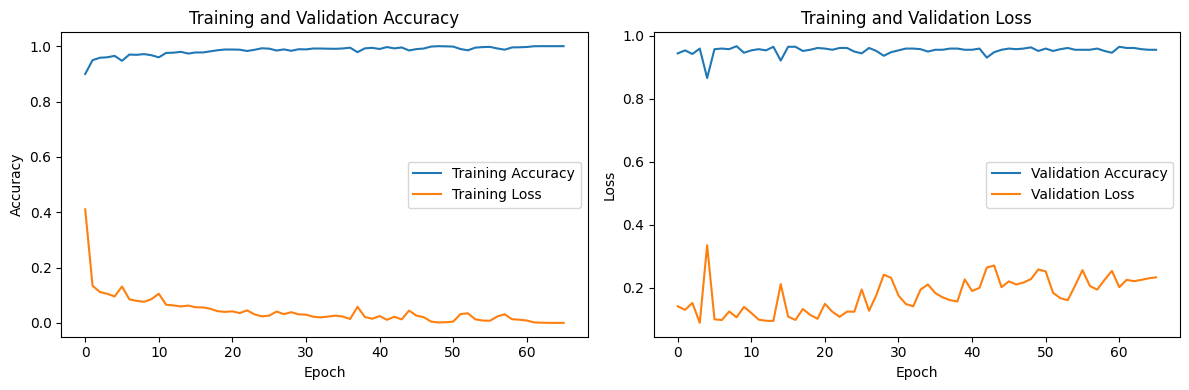

The best validation obtained is 0.9675572514533997


In [58]:
# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(result_cnna.history['accuracy'], label='Training Accuracy')
plt.plot(result_cnna.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(result_cnna.history['val_accuracy'], label='Validation Accuracy')
plt.plot(result_cnna.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [61]:
maxaccu_cnna = max(result_cnna.history['val_accuracy'])
print(f'The best validation obtained is {maxaccu_cnna}')

CNN_A.predict(data_test)

The best validation obtained is 0.982824444770813


In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have features X and labels y

# Create a Random Forest model
rf_modela = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_modela.fit(data_tr, label_train)

# Make predictions on the validation set
y_pred = rf_modela.predict(data_va)

# Evaluate the model
accu_rf = accuracy_score(label_val, y_pred)
print("Validation Accuracy:", accu_rf)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(label_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(label_val, y_pred))


c:\Users\zhujy\.conda\envs\ALMS\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation Accuracy: 0.9599236641221374

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       135
           1       0.96      0.99      0.97       389

    accuracy                           0.96       524
   macro avg       0.97      0.93      0.95       524
weighted avg       0.96      0.96      0.96       524


Confusion Matrix:
[[117  18]
 [  3 386]]
